# Лабораторная на Регрессию |

В ходе этой работы мы проведём регрессию на синтетических данных при помощи линейной регрессии

## Импортируем библиотеки

In [52]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Генерируем данные, делим их на выборки и визуализируем

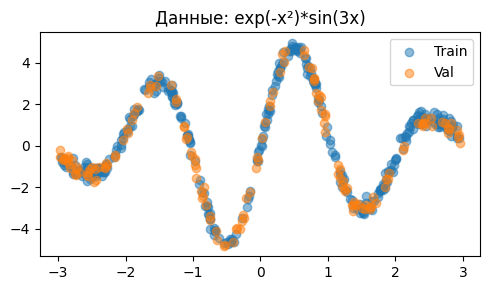

In [53]:
np.random.seed(42)
n_samples = 500

X_osc = np.random.uniform(-3, 3, n_samples)
y_osc = np.exp(-X_osc**2/5) * np.sin(3*X_osc) * 5 + np.random.normal(0, 0.2, n_samples)

X_step = np.random.uniform(-5, 5, n_samples)
y_step = np.tanh(X_step*2) + 0.1*X_step + np.random.normal(0, 0.15, n_samples)

X_rad = np.random.uniform(0, 10, n_samples)
y_rad = np.sqrt(X_rad) * np.sin(X_rad) + np.random.normal(0, 0.3, n_samples)

X = X_osc.reshape(-1, 1)
y = y_osc

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(5, 3))
plt.scatter(X_train, y_train, alpha=0.5, label='Train')
plt.scatter(X_val, y_val, alpha=0.5, label='Val')
plt.title("Данные: exp(-x²)*sin(3x)")
plt.legend()
plt.tight_layout()
plt.show()

Как мы видим вышла очень красивая кривулина из данных, теперь попробуем ей воспользоваться для обучения модели (данные синтетические, поэтому обрабатывать их и как либо работать с ними не нужно).

## Проверим разные степени полиномов и выберем лучшие

In [54]:
degrees = [1, 5, 10, 12, 15, 17, 20, 25, 35, 50]
results = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    results.append({
        'degree': degree,
        'train_mse': train_mse,
        'val_mse': val_mse,
        'model': model,
        'poly': poly
    })

    print(f"Degree {degree}: Train MSE = {train_mse:.4f}, Val MSE = {val_mse:.4f}")

Degree 1: Train MSE = 5.2980, Val MSE = 5.2083
Degree 5: Train MSE = 4.7297, Val MSE = 5.0784
Degree 10: Train MSE = 0.4193, Val MSE = 0.5832
Degree 12: Train MSE = 0.0641, Val MSE = 0.0830
Degree 15: Train MSE = 0.0363, Val MSE = 0.0473
Degree 17: Train MSE = 0.0360, Val MSE = 0.0473
Degree 20: Train MSE = 0.0358, Val MSE = 0.0476
Degree 25: Train MSE = 0.0501, Val MSE = 0.0707
Degree 35: Train MSE = 4.4885, Val MSE = 5.0411
Degree 50: Train MSE = 4.9410, Val MSE = 5.0579


Линейной зависимости не хватает, а судя по циферкам самые лучшая степень это 17

## Просмотрим артефакты модели с полиномом 17 степени


=== АНАЛИЗ ДЛЯ DEGREE=17 ===
Train MSE: 0.036012
Val MSE: 0.047280
Разница: 0.011268 (признак переобучения)
Коэффициентов модели: 17


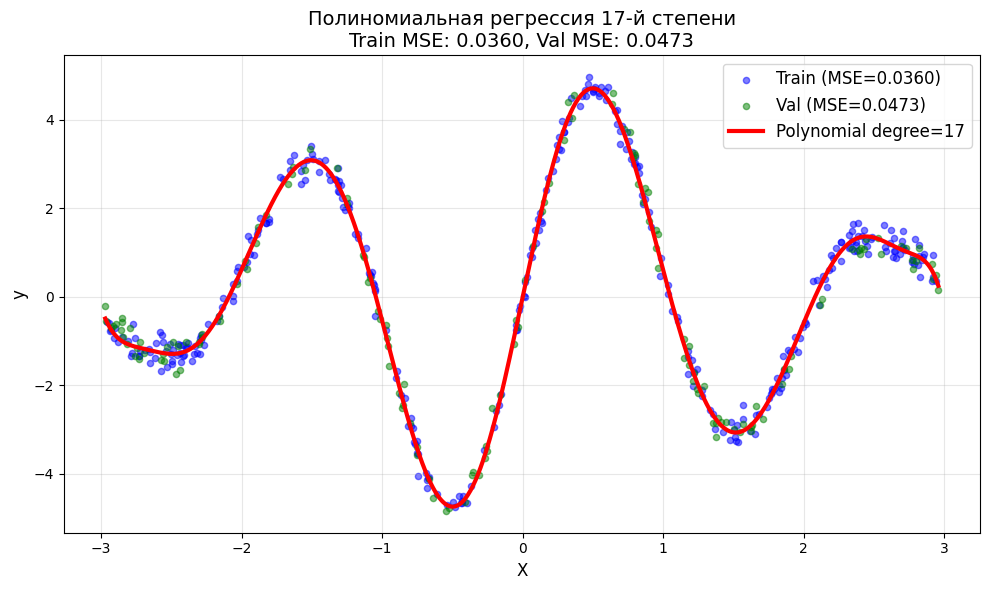

In [59]:
res_17 = next((r for r in results if r['degree'] == 17), None)

if res_17 is not None:
    X_train_poly_17 = res_17['poly'].transform(X_train)
    X_val_poly_17 = res_17['poly'].transform(X_val)

    X_plot = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    X_plot_poly = res_17['poly'].transform(X_plot)
    y_plot_pred = res_17['model'].predict(X_plot_poly)

    y_train_pred = res_17['model'].predict(X_train_poly_17)
    y_val_pred = res_17['model'].predict(X_val_poly_17)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, alpha=0.5, s=20, label=f'Train (MSE={res_17["train_mse"]:.4f})', color='blue')
    plt.scatter(X_val, y_val, alpha=0.5, s=20, label=f'Val (MSE={res_17["val_mse"]:.4f})', color='green')

    plt.plot(X_plot, y_plot_pred, 'r-', linewidth=3, label='Polynomial degree=17')

    plt.title(f'Полиномиальная регрессия 17-й степени\nTrain MSE: {res_17["train_mse"]:.4f}, Val MSE: {res_17["val_mse"]:.4f}', fontsize=14)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()


    print(f"\n=== АНАЛИЗ ДЛЯ DEGREE=17 ===")
    print(f"Train MSE: {res_17['train_mse']:.6f}")
    print(f"Val MSE: {res_17['val_mse']:.6f}")
    print(f"Разница: {res_17['val_mse'] - res_17['train_mse']:.6f} (признак переобучения)")
    print(f"Коэффициентов модели: {len(res_17['model'].coef_)}")

else:
    print("Нет данных для degree=17. Проверь список degrees.")

Вышла хорошая модель по визуализации и метрикам, поэтому ей и оставляем

## Вывод
Успешно вышло сгенерировать данные, удалось обучить линейную регрессию с полиномом 17 степени и показать её артефакты. Однако 17 степень выглядит как переобучение (если будем выходить за пределы синтетических данных), поэтому стоит быть с ней аккуратным